### 1. Color Space

#### 1-1. Gray Scale

In [1]:
import scipy.misc as sp

In [2]:
img_gray = sp.face(gray=True)
#  gray_scale의 특정 이미지

In [3]:
img_gray.shape

(768, 1024)

→ 786x1024 크기의 2차원 이미지이다.<br>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

* 좌상단 15, 15의 이미지만 시각화

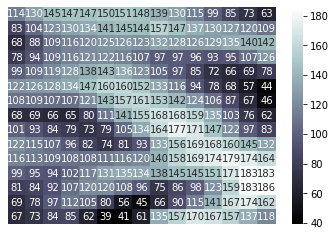

In [5]:
sns.heatmap(img_gray[:15, :15], annot=True, fmt='d', cmap=plt.cm.bone)
plt.axis('off')
plt.show()

→ 이미지 픽셀이 숫자로 구성되어있음을 확인할 수 있다.

* 좌상단 40, 40의 이미지만 시각화

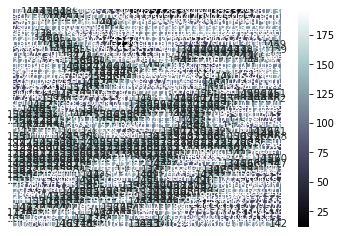

In [6]:
sns.heatmap(img_gray[:40, :40], annot=True, fmt='d', cmap=plt.cm.bone)
plt.axis('off')
plt.show()

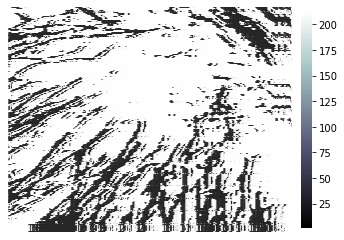

In [7]:
sns.heatmap(img_gray[:200, :200], annot=True, fmt='d', cmap=plt.cm.bone)
plt.axis('off')
plt.show()

* 원본 이미지 시각화

(-0.5, 1023.5, 767.5, -0.5)

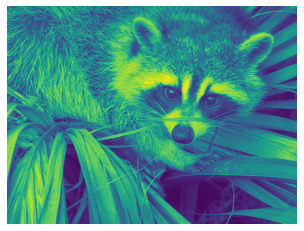

In [8]:
plt.imshow(img_gray)
plt.axis('off')

#### 1-2 RGB Scale

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


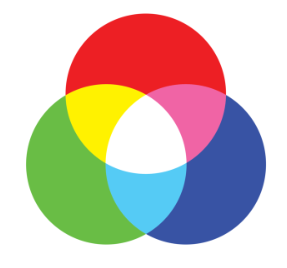

In [ ]:
from PIL import Image
Image.open('/content/drive/MyDrive/CDS2(2022-2)/alpha/rgb.png')

In [10]:
from sklearn.datasets import load_sample_images

In [11]:
dataset = load_sample_images()
# 이미지 샘플 가져오기
img_rgb = dataset.images[0]
# 첫번째 장

In [12]:
img_rgb.shape

(427, 640, 3)

→ 앞서 2차원이었던 gray scale img와는 달리 3차원(RGB) 형식이다.<br>

* 원본 이미지 시각화

(-0.5, 639.5, 426.5, -0.5)

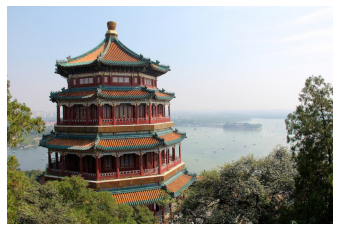

In [13]:
plt.imshow(img_rgb)
plt.axis("off")

* 채널별로 이미지의 일부를 시각화하여 Pixel이 높은 값을 확인해본다.

Text(0.5, 1.0, 'RGB')

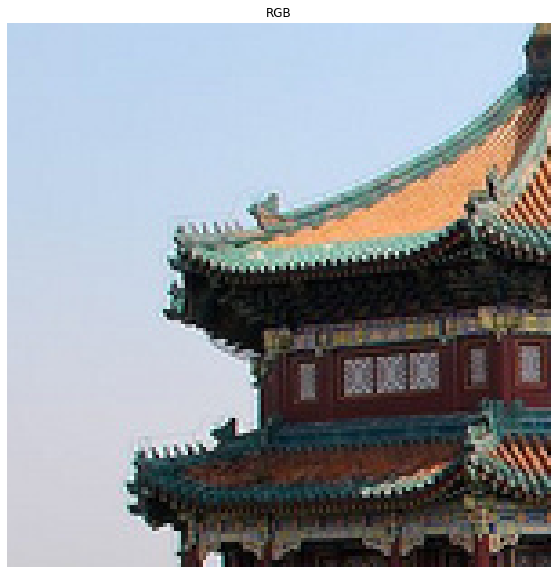

In [14]:
plt.figure(figsize=(20, 10))

plt.imshow(img_rgb[50:200, 50:200, :])
plt.axis("off")
plt.title("RGB")

Text(0.5, 1.0, 'R')

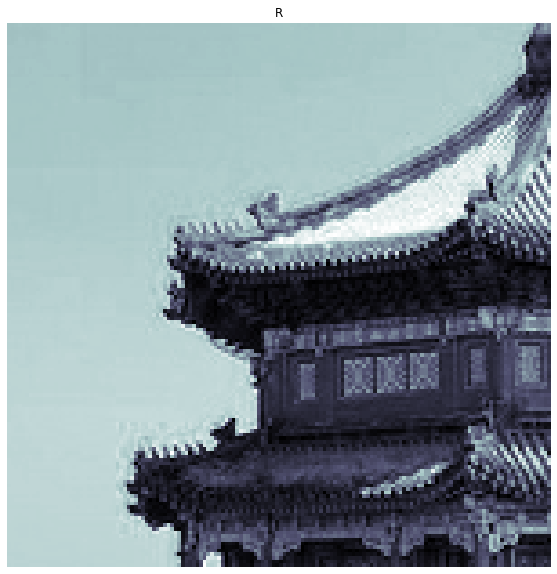

In [15]:
plt.figure(figsize=(20, 10))

plt.imshow(img_rgb[50:200, 50:200, 0], cmap=plt.cm.bone)
plt.axis("off")
plt.title("R")

Text(0.5, 1.0, 'G')

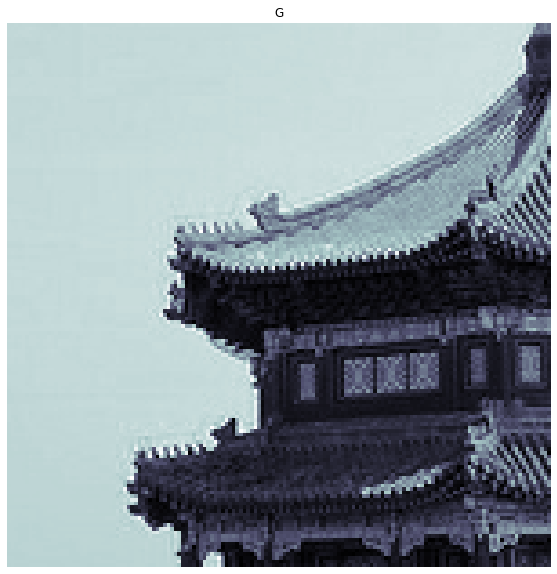

In [16]:
plt.figure(figsize=(20, 10))

plt.imshow(img_rgb[50:200, 50:200, 1], cmap=plt.cm.bone)
plt.axis("off")
plt.title("G")

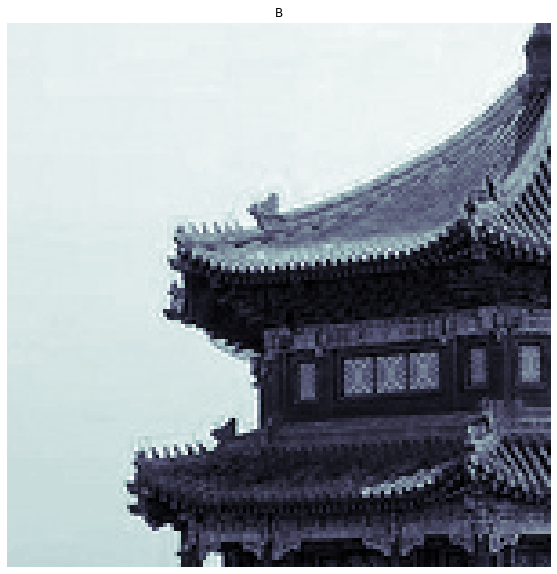

In [17]:
plt.figure(figsize=(20, 10))

plt.imshow(img_rgb[50:200, 50:200, 2], cmap=plt.cm.bone)
plt.axis("off")
plt.title("B")
plt.show()

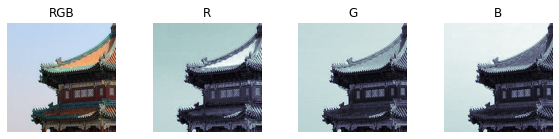

In [18]:
plt.figure(figsize=(10, 2))

plt.subplot(141)
plt.imshow(img_rgb[50:200, 50:200, :])
plt.axis("off")
plt.title("RGB")

plt.subplot(142)
plt.imshow(img_rgb[50:200, 50:200, 0], cmap=plt.cm.bone)
plt.axis("off")
plt.title("R")

plt.subplot(143)
plt.imshow(img_rgb[50:200, 50:200, 1], cmap=plt.cm.bone)
plt.axis("off")
plt.title("G")

plt.subplot(144)
plt.imshow(img_rgb[50:200, 50:200, 2], cmap=plt.cm.bone)
plt.axis("off")
plt.title("B")

plt.show()

### 2. HSV : RGB보다 색을 더 쉽게 분리할 수 있다.

In [19]:
Image.open('/content/drive/MyDrive/CDS2(2022-2)/alpha/hsv.png')

NameError: ignored

* Hue(색상) : 색상값(0~360)<br>
* Saturation(채도) : 색상의 진하기(0~100)<br>
* Value(명도) : 색상의 밝기(0~100)

In [20]:
from matplotlib.colors import hsv_to_rgb
import numpy as np

In [21]:
V, H = np.mgrid[0:1:100j, 0:1:360j]
# V : 명도 0~100
# H : 색상 0~360
S = np.ones_like(V)
# 채도 100으로 설정

In [22]:
HSV_S100 = np.dstack((H, S*1.0, V))
# 채도를 100으로 설정
RGB_S100 = hsv_to_rgb(HSV_S100)
# RGB로 변환

In [23]:
HSV_S20 = np.dstack((H, S*0.2, V))
# 채도를 20으로 설정
RGB_S20 = hsv_to_rgb(HSV_S20)

In [24]:
HSV_S20.shape
# 전체 이미지 차원

(100, 360, 3)

In [25]:
HSV_S20[:4, :5, 0]
# H : 색상값만 가져오기

array([[0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206]])

In [26]:
HSV_S20[:4, :5, 1]
# S : 채도값만 가져오기

array([[0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2]])

In [27]:
HSV_S20[:4, :5, 2]
# V : 명도값만 가져오기

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.01010101],
       [0.02020202, 0.02020202, 0.02020202, 0.02020202, 0.02020202],
       [0.03030303, 0.03030303, 0.03030303, 0.03030303, 0.03030303]])

* 채도 차이

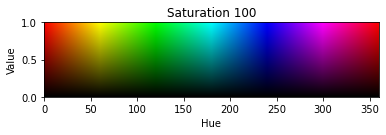

In [28]:
plt.imshow(RGB_S100, origin="lower", extent=[0, 360, 0, 1], aspect=80)
plt.xlabel("Hue")
plt.ylabel("Value")
plt.title("Saturation 100")
plt.grid(False)

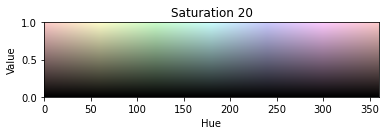

In [29]:
plt.imshow(RGB_S20, origin="lower", extent=[0, 360, 0, 1], aspect=80)
plt.xlabel("Hue")
plt.ylabel("Value")
plt.title("Saturation 20")
plt.grid(False)

### 3. Image Handling

#### 3-1. Pillow : Python Imamging Library 대체

In [30]:
import PIL

In [31]:
from PIL import Image

* 드라이브에 있는 이미지 시각화

In [32]:
sk = Image.open('/content/drive/MyDrive/CDS2(2022-2)/img/06/sk.png')
# 이미지 열기

In [ ]:
# sk.save('./sk.png')
# 저장

In [33]:
sk.size

(568, 246)

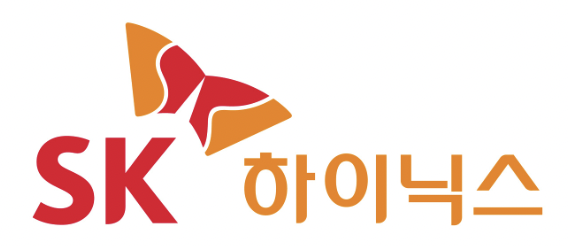

In [34]:
sk

* 이미지 데이터 처리

In [35]:
sk_array = np.array(sk)
# Image 객체를 numpy 배열로 변환

In [36]:
sk_array

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 254, 255, 255],
        [255, 255, 255, 255],
        [255, 254, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [254, 255, 254, 255],
        ...,
        [255, 255, 254, 255],
        [255, 255, 255, 255],
        [255, 255, 254, 255]],

       [[255, 254, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 254, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 254, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 254, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 254, 255],
        ...,
        [254, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

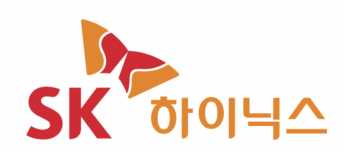

In [37]:
plt.imshow(sk_array)
plt.axis('off')
plt.show()

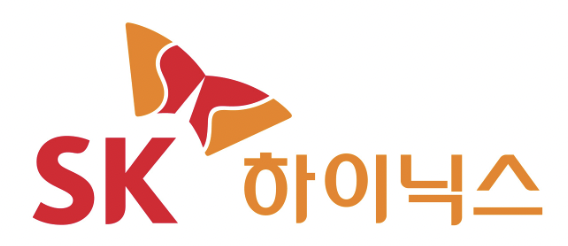

In [38]:
Image.fromarray(sk_array)
# numpy 배열을 다시 image 객체로 변환

* 이미지 크기 변환

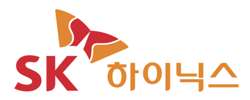

In [39]:
sk_re = sk.resize((250, 100))
sk_re

→ image 사이즈를 모델에 맞게 조정할 때 사용가능.

* 이미지 회전 및 자르기

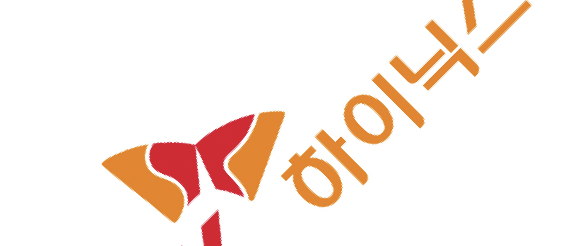

In [40]:
sk_rotated = sk.rotate(45)
sk_rotated
# 회전

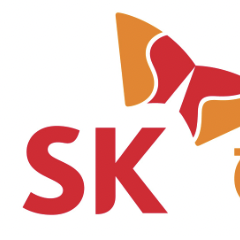

In [41]:
sk_crropped = sk.crop((10, 10, 250, 250))
# 좌상단,우하단 좌표
sk_crropped

→ 뒤에서 더 자세히.

#### 3-2. Scikt-Image

In [42]:
import skimage.data
# sample image 제공

In [43]:
img = skimage.data.astronaut()

In [44]:
img.shape
# numpy 배열

(512, 512, 3)

In [45]:
img

array([[[154, 147, 151],
        [109, 103, 124],
        [ 63,  58, 102],
        ...,
        [127, 120, 115],
        [120, 117, 106],
        [125, 119, 110]],

       [[177, 171, 171],
        [144, 141, 143],
        [113, 114, 124],
        ...,
        [127, 118, 112],
        [124, 115, 108],
        [121, 116, 105]],

       [[201, 194, 193],
        [182, 178, 175],
        [168, 165, 164],
        ...,
        [128, 120, 117],
        [126, 116, 112],
        [124, 114, 109]],

       ...,

       [[186, 170, 176],
        [186, 170, 177],
        [183, 168, 170],
        ...,
        [  0,   0,   0],
        [  0,   0,   1],
        [  0,   0,   0]],

       [[183, 169, 170],
        [182, 167, 171],
        [185, 164, 176],
        ...,
        [  0,   0,   1],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[184, 167, 172],
        [183, 165, 169],
        [180, 162, 171],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0]]

In [46]:
from skimage import color

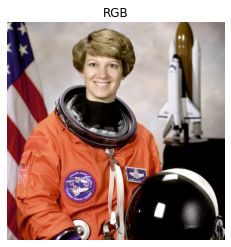

In [47]:
plt.imshow(img)
plt.axis("off")
plt.title("RGB")
plt.show()

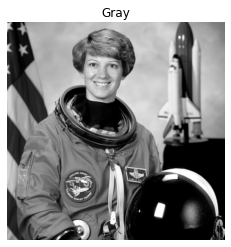

In [48]:
plt.imshow(color.rgb2gray(img), cmap=plt.cm.gray)
plt.axis("off")
plt.title("Gray")
plt.show()

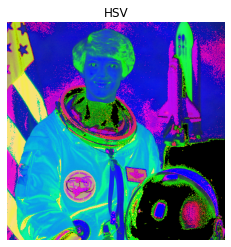

In [49]:
plt.imshow(color.rgb2hsv(img))
plt.axis("off")
plt.title("HSV")
plt.show()

* 이미지 불러오기

In [50]:
img_pro = skimage.io.imread("/content/drive/MyDrive/CDS2(2022-2)/img/06/professor.jpeg")

In [51]:
img_pro

array([[[145, 131, 104],
        [143, 132, 104],
        [143, 132, 104],
        ...,
        [127, 123,  96],
        [127, 123,  96],
        [127, 123,  96]],

       [[142, 131, 103],
        [142, 131, 103],
        [141, 130, 102],
        ...,
        [125, 121,  94],
        [125, 121,  94],
        [125, 121,  94]],

       [[140, 129, 101],
        [140, 129, 101],
        [139, 130, 101],
        ...,
        [123, 119,  92],
        [123, 119,  92],
        [122, 118,  91]],

       ...,

       [[ 37,  36,  41],
        [ 48,  47,  52],
        [ 47,  46,  51],
        ...,
        [ 13,  13,  13],
        [ 10,  10,  10],
        [ 13,  13,  13]],

       [[ 36,  34,  45],
        [ 61,  60,  68],
        [ 60,  59,  65],
        ...,
        [ 17,  17,  17],
        [ 16,  16,  16],
        [ 16,  16,  16]],

       [[ 37,  35,  46],
        [ 45,  44,  52],
        [ 64,  63,  69],
        ...,
        [ 17,  17,  17],
        [ 17,  17,  17],
        [ 17,  17,  17]]

In [52]:
img_pro.shape

(1602, 1280, 3)

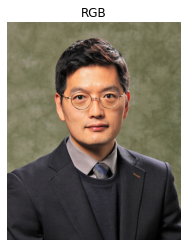

In [53]:
plt.imshow(img_pro)
plt.axis("off")
plt.title("RGB")
plt.show()

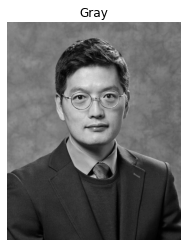

In [54]:
plt.imshow(color.rgb2gray(img_pro), cmap=plt.cm.gray)
plt.axis("off")
plt.title("Gray")
plt.show()

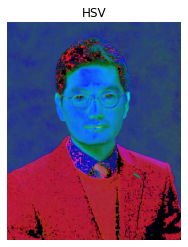

In [55]:
plt.imshow(color.rgb2hsv(img_pro))
plt.axis("off")
plt.title("HSV")
plt.show()

In [ ]:
# skimage.io.imsave("img_pro.jpeg", img_pro)
# 저장

### 3-3. OpenCV

In [56]:
import cv2

In [57]:
img_pro = cv2.imread("/content/drive/MyDrive/CDS2(2022-2)/img/06/professor.jpeg")

In [58]:
img_pro

array([[[104, 132, 143],
        [104, 132, 143],
        [104, 133, 142],
        ...,
        [ 96, 123, 127],
        [ 96, 123, 127],
        [ 96, 123, 127]],

       [[103, 131, 142],
        [103, 131, 142],
        [102, 131, 140],
        ...,
        [ 94, 121, 125],
        [ 94, 121, 125],
        [ 94, 121, 125]],

       [[101, 129, 140],
        [101, 129, 140],
        [101, 130, 139],
        ...,
        [ 92, 119, 123],
        [ 92, 119, 123],
        [ 91, 118, 122]],

       ...,

       [[ 42,  36,  37],
        [ 52,  47,  48],
        [ 51,  46,  47],
        ...,
        [ 13,  13,  13],
        [ 10,  10,  10],
        [ 13,  13,  13]],

       [[ 43,  35,  36],
        [ 66,  60,  61],
        [ 64,  59,  60],
        ...,
        [ 17,  17,  17],
        [ 16,  16,  16],
        [ 16,  16,  16]],

       [[ 44,  36,  37],
        [ 50,  44,  45],
        [ 69,  63,  64],
        ...,
        [ 17,  17,  17],
        [ 17,  17,  17],
        [ 17,  17,  17]]

In [59]:
img_pro.shape

(1602, 1280, 3)

*주의 : opencv는 image를 numpy 배열로 받아올때 BGR순서로 가져온다. 따라서 시각화를 하기 위해서는 RGB로 변경해주어야한다.

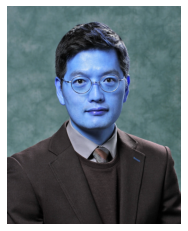

In [60]:
plt.imshow(img_pro)
plt.axis('off')
plt.show()

In [61]:
b, g, r = cv2.split(img_pro)
# b, g, r 채널로 분리

In [62]:
img_pro_re = cv2.merge([r, g, b])
# 분리시킨 채널을 다시 r, g, b 순서로 병합

In [63]:
img_pro_re = cv2.cvtColor(img_pro, cv2.COLOR_BGR2RGB)
# 한번에 채널 변경

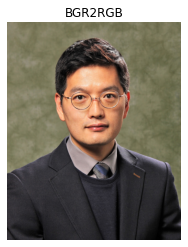

In [64]:
plt.imshow(img_pro_re)
plt.axis("off")
plt.title("BGR2RGB")
plt.show()

In [65]:
# cv2.imwrite("/img_pro_sample.png", img_pro_re)
# 저장

* 이미지 크기 변환

In [66]:
img_pro_resized = cv2.resize(img_pro_re, dsize=(60, 80))
img_pro_resized.shape

(80, 60, 3)

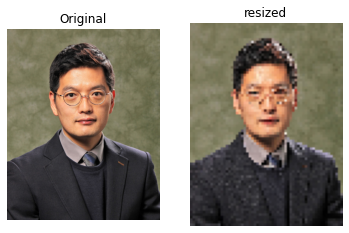

In [67]:
plt.subplot(121)
plt.imshow(img_pro_re)
plt.title("Original")
plt.axis("off")

plt.subplot(122)
plt.imshow(img_pro_resized)
plt.title("resized")
plt.axis("off")

plt.show()